In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'

# 2D Advection Equation

In [26]:
nx = 21
ny = 21
Lx = 1.0
Ly = 1.0
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = Lx/(nx-1)
dy = Ly/(ny-1)
xx, yy = np.meshgrid(x, y)

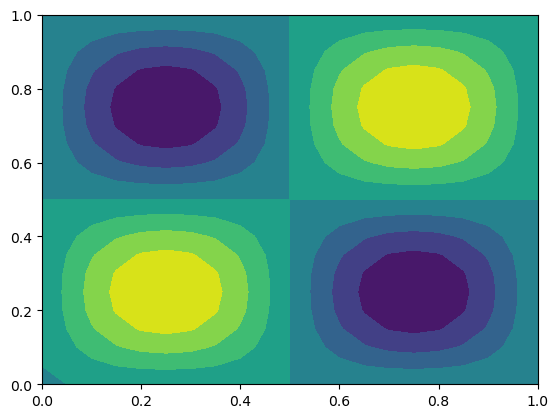

In [27]:
ω0 = 2.0*np.pi
u0 = lambda x, y: np.sin(ω0*x) * np.sin(ω0*y)
# plotting the initial conditions
plt.contourf(xx, yy, u0(xx, yy))

In [28]:
cx = 1.0
cy = 1.0

dt = 0.001
tend = 2.0
t = 0

cflx = cx * dt/dx
cfly = cy * dt/dy

# setup initial condition
sol = []
u = np.zeros([nx+2, ny+2])
u[1:-1, 1:-1] = u0(xx, yy)
# set periodic boundaries

u[:,0] = u[:,-3] #x-minus face
u[:,-1] = u[:,2] #x-plus face
u[0,:] = u[-3,:] #y-minus face
u[-1,:] = u[2,:] #y-plus face
sol.append(u)

In [29]:
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1, 1:-1] = un[1:-1, 1:-1] - cflx * (un[1:-1, 1:-1] - un[1:-1, :-2]) - cfly * (un[1:-1, 1:-1] - un[:-2,1:-1])
    unew[:,0] = unew[:,-3] #x-minus face
    unew[:,-1] = unew[:,2] #x-plus face
    unew[0,:] = unew[-3,:] #y-minus face
    unew[-1,:] = unew[2,:] #y-plus face
    unew[-1] = unew[2]
    unew[0] = unew[-3]
    sol.append(unew)
    t += dt

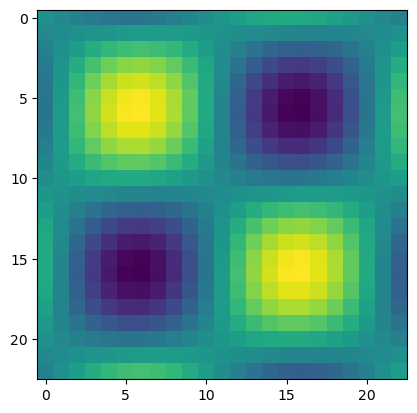

In [14]:
plt.imshow(sol[1000])

# Trying to make the solution look like what we have in Gaussian Plume Practical

TypeError: Dimensions of C (23, 23) should be one smaller than X(21) and Y(21) while using shading='flat' see help(pcolor)

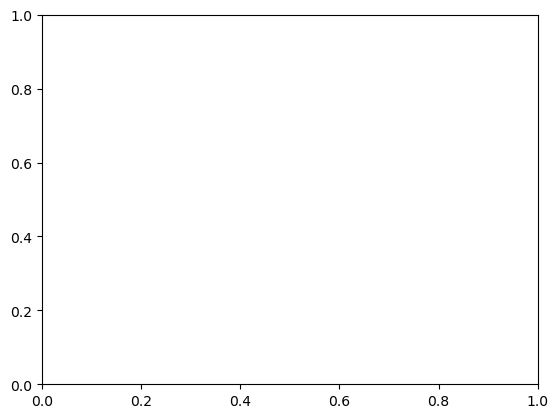

In [34]:
plt.pcolor(x, y, np.mean(sol, axis=0), cmap='jet')

In [36]:
np.mean(sol, axis=1)

array([[ 1.99116086e-17,  0.00000000e+00, -2.11183728e-17, ...,
         1.99116086e-17,  2.03646158e-32, -2.11183728e-17],
       [ 2.40980117e-04,  1.41417675e-19, -2.40980117e-04, ...,
         2.40980117e-04,  4.90247939e-19, -2.40980117e-04],
       [ 4.90184110e-04,  9.63920469e-06, -4.71849254e-04, ...,
         4.90184110e-04,  9.63920469e-06, -4.71849254e-04],
       ...,
       [-2.66513495e-04, -1.05436892e-04,  6.59606095e-05, ...,
        -2.66513495e-04, -1.05436892e-04,  6.59606095e-05],
       [-2.67119067e-04, -1.11879956e-04,  5.43107454e-05, ...,
        -2.67119067e-04, -1.11879956e-04,  5.43107454e-05],
       [-2.67498154e-04, -1.18089520e-04,  4.28785386e-05, ...,
        -2.67498154e-04, -1.18089520e-04,  4.28785386e-05]])

In [31]:
np.array(sol).shape

(2002, 23, 23)

In [24]:
dxy = 100
x=np.mgrid[-2500:2500+dxy:dxy]
y=x
days = 50
wind_dir = 0.*np.ones((days*24,1)) # What does this mean?
sol = np.zeros((len(x), len(y), len(wind_dir)))

In [22]:
ω0 = 2.0*np.pi
u0 = lambda x, y: np.sin(ω0*x) * np.sin(ω0*y)
for i in range(0, len(wind_dir)):
    u = np.zeros([nx+2, ny+2])
    u[1:-1, 1:-1] = u0(xx, yy)

1200